<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M7_AI2_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estudiante:** César Emilio García Ávalos

**Actividad:** M7_AI2_Frameworks

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**USO DE TENSORFLOW**

In [45]:
# Cargar los datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

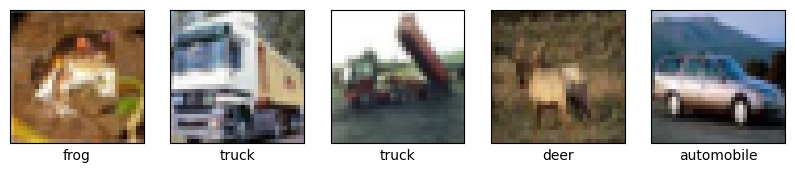

In [46]:
# Etiquetas de las clases en CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizar una muestra de datos
def plot_sample_images(x, y, class_names, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i])
        plt.xlabel(class_names[y[i][0]])
    plt.show()

# Mostrar las primeras 5 imágenes de entrenamiento
plot_sample_images(x_train, y_train, class_names)

In [47]:
# Preparar los datos CIFAR-10
x_train, x_test = x_train / 255.0, x_test / 255.0

In [48]:
# Dividir datos en entrenamiento y validación
x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

In [49]:
# Crear el modelo
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10),
    Softmax()
])

In [50]:
# Imprimir el resumen del modelo
model.summary()

# Verificar con un lote de datos
x_sample = tf.random.normal([1, 32, 32, 3])
y_sample = model(x_sample)
print("Output shape:", y_sample.shape)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 softmax_1 (Softmax)         (None, 10)                0         
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Output shape: (1, 

In [51]:
# Compilar el modelo
model.compile(optimizer=SGD(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [52]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=100, batch_size=16,
                    validation_data=(x_val, y_val))

Epoch 1/100
2500/2500 [==============================] - 9s 4ms/step - loss: 1.8810 - accuracy: 0.3219 - val_loss: 1.7596 - val_accuracy: 0.3649
Epoch 2/100
2500/2500 [==============================] - 10s 4ms/step - loss: 1.6998 - accuracy: 0.3902 - val_loss: 1.6849 - val_accuracy: 0.4014
Epoch 3/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.6233 - accuracy: 0.4234 - val_loss: 1.6041 - val_accuracy: 0.4329
Epoch 4/100
2500/2500 [==============================] - 9s 4ms/step - loss: 1.5633 - accuracy: 0.4451 - val_loss: 1.5992 - val_accuracy: 0.4326
Epoch 5/100
2500/2500 [==============================] - 9s 4ms/step - loss: 1.5220 - accuracy: 0.4575 - val_loss: 1.5934 - val_accuracy: 0.4435
Epoch 6/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.4913 - accuracy: 0.4685 - val_loss: 1.5847 - val_accuracy: 0.4313
Epoch 7/100
2500/2500 [==============================] - 10s 4ms/step - loss: 1.4618 - accuracy: 0.4790 - val_loss: 1.5113 - val_

In [53]:
# Evaluar el modelo en los datos de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 1.9401 - accuracy: 0.4932 - 645ms/epoch - 2ms/step
Test accuracy: 0.49320000410079956


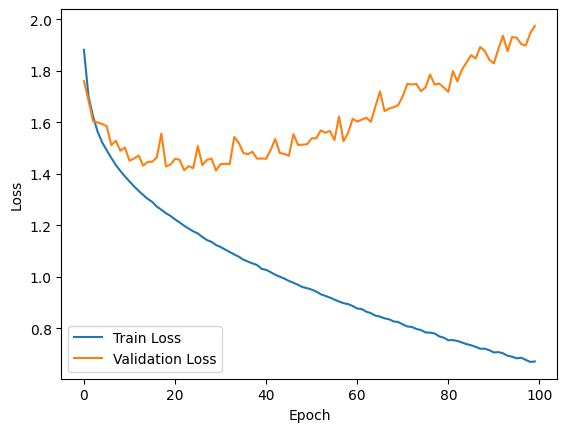

In [54]:
# Graficar curvas de pérdida
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Se identifica en el gráfico que la pérdida de entrenamiento disminuye, pero la pérdida de validación muestra un incremento continuo y significativo. Este aumento es una clara señal de sobreajuste, indicando que el modelo está aprendiendo demasiado bien los detalles y el ruido del conjunto de entrenamiento.

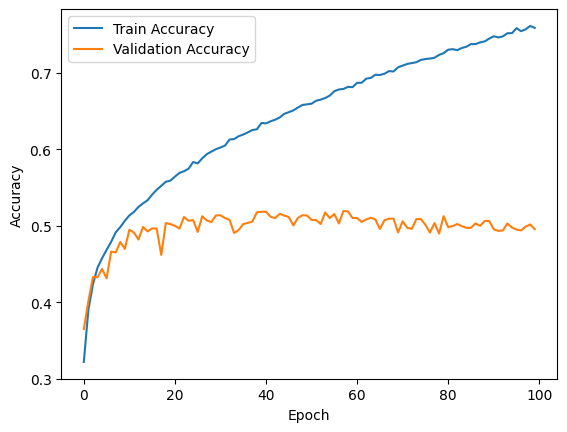

In [55]:
# Graficar curvas de accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Accuracy y Pérdida (Loss) durante el Entrenamiento:**

La precisión (accuracy) del modelo en el conjunto de entrenamiento aumenta constantemente. La pérdida (loss) del modelo en el conjunto de entrenamiento disminuye gradualmente, indicando que el modelo está aprendiendo y ajustándose a los datos.

**Accuracy y Pérdida en el Conjunto de Validación:**

La precisión en el conjunto de validación sigue una tendencia general de mejora, aunque con algunas fluctuaciones. La pérdida en el conjunto de validación también muestra una tendencia a la baja inicialmente, pero comienza a aumentar después de varias épocas, sugiriendo posibles problemas de sobreajuste.

**Detección de Sobreajuste (Overfitting)**
Observando los valores de pérdida y precisión en el conjunto de validación, se puede notar que después de la época 30, la pérdida en el conjunto de validación comienza a aumentar mientras que la precisión en el conjunto de validación se estabiliza o incluso disminuye ligeramente. Este es un signo de sobreajuste, donde el modelo se está ajustando demasiado bien a los datos de entrenamiento y no generaliza bien a los datos nuevos (de validación).

**USO DE PYTORCH**

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import numpy as np

In [57]:
# Transformaciones y carga de datos CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_val_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [58]:
# Dividir datos en entrenamiento y validación
train_size = int(0.8 * len(train_val_data))
val_size = len(train_val_data) - train_size
train_data, val_data = random_split(train_val_data, [train_size, val_size])

# Ajustar el tamaño del lote a 16
batch_size = 16

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

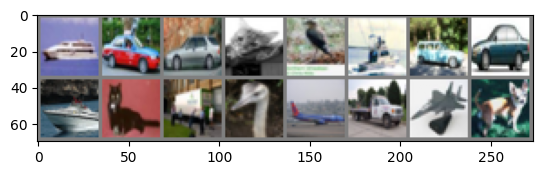

ship  car   car   cat   bird  ship  car   car   ship  cat   truck bird  plane truck plane dog  


In [59]:
# Etiquetas de las clases en CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Función para desnormalizar las imágenes y mostrar
def imshow(img):
    img = img / 2 + 0.5  # Desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtener un lote de imágenes del conjunto de entrenamiento
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Mostrar imágenes
imshow(torchvision.utils.make_grid(images))

# Imprimir las etiquetas
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [60]:
# Definir la red neuronal
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

In [61]:
# Definir el optimizador y la función de pérdida
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [62]:
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        train_losses.append(running_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy)
        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    return train_accuracies, val_accuracies, train_losses, val_losses

In [63]:
# Entrenar el modelo
train_accuracies, val_accuracies, train_losses, val_losses = train_model(model, train_loader, val_loader, criterion, optimizer)

Epoch 1/100, Train Loss: 1.8358, Val Loss: 1.6689, Val Accuracy: 40.56%
Epoch 2/100, Train Loss: 1.5833, Val Loss: 1.5610, Val Accuracy: 44.70%
Epoch 3/100, Train Loss: 1.4765, Val Loss: 1.4887, Val Accuracy: 47.75%
Epoch 4/100, Train Loss: 1.4007, Val Loss: 1.4533, Val Accuracy: 49.27%
Epoch 5/100, Train Loss: 1.3379, Val Loss: 1.4322, Val Accuracy: 50.34%
Epoch 6/100, Train Loss: 1.2864, Val Loss: 1.4291, Val Accuracy: 50.54%
Epoch 7/100, Train Loss: 1.2366, Val Loss: 1.4040, Val Accuracy: 50.91%
Epoch 8/100, Train Loss: 1.1954, Val Loss: 1.4154, Val Accuracy: 51.30%
Epoch 9/100, Train Loss: 1.1561, Val Loss: 1.3955, Val Accuracy: 52.24%
Epoch 10/100, Train Loss: 1.1211, Val Loss: 1.4140, Val Accuracy: 51.37%
Epoch 11/100, Train Loss: 1.0825, Val Loss: 1.4241, Val Accuracy: 51.41%
Epoch 12/100, Train Loss: 1.0558, Val Loss: 1.4149, Val Accuracy: 51.53%
Epoch 13/100, Train Loss: 1.0222, Val Loss: 1.4519, Val Accuracy: 50.68%
Epoch 14/100, Train Loss: 0.9900, Val Loss: 1.4572, Val Accu

In [64]:
# Evaluar el modelo en los datos de test
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 47.88%


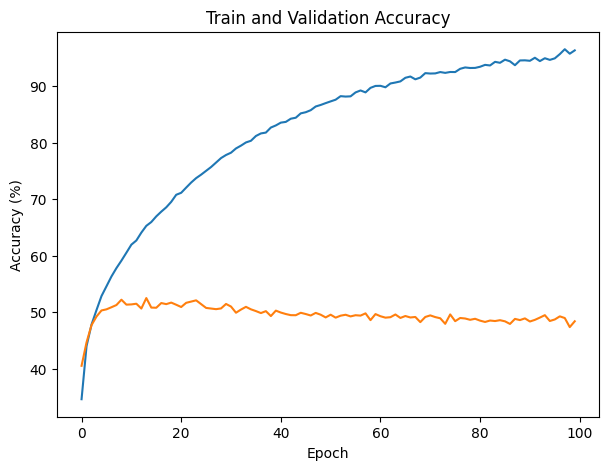

In [65]:
# Graficar curvas de precisión
plt.figure(figsize=(7, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train and Validation Accuracy')
plt.show()

Se identifica en el gráfico que la pérdida de entrenamiento disminuye, pero la pérdida de validación muestra un incremento continuo y significativo. Este aumento es una clara señal de sobreajuste, indicando que el modelo está aprendiendo demasiado bien los detalles y el ruido del conjunto de entrenamiento.

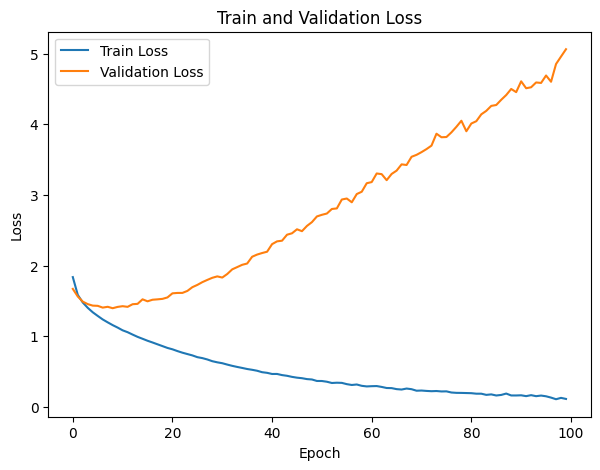

In [66]:
# Graficar pérdida
plt.figure(figsize=(7, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

**Pérdida de Entrenamiento (Train Loss):**
La pérdida de entrenamiento disminuye consistentemente a lo largo de las 100 épocas, lo que indica que el modelo está aprendiendo y ajustándose bien a los datos de entrenamiento.

**Pérdida de Validación (Val Loss):**
La pérdida de validación disminuye inicialmente, pero después de las primeras 10-15 épocas, comienza a aumentar de manera constante. Este comportamiento es un claro indicio de sobreajuste, ya que el modelo continúa mejorando en los datos de entrenamiento mientras empeora en los datos de validación.

**Exactitud de Validación (Val Accuracy):**
La exactitud de validación mejora inicialmente, alcanzando un pico en las primeras 10-15 épocas, pero luego muestra fluctuaciones y no mejora significativamente. De hecho, comienza a disminuir hacia el final del entrenamiento.

**Análisis:**
**Sobreajuste (Overfitting):** El aumento continuo de la pérdida de validación mientras que la pérdida de entrenamiento sigue disminuyendo es un signo claro de sobreajuste. El modelo está memorizando los datos de entrenamiento en lugar de generalizar bien en los datos de validación.

**Punto de Saturación:** La pérdida de validación alcanza su valor más bajo alrededor de las 10-15 épocas. Después de este punto, tanto la pérdida de validación como la exactitud de validación indican que el modelo no está mejorando en su capacidad de generalización.

**Exactitud de Validación:** La exactitud de validación alcanza un máximo de alrededor del 52% y luego disminuye ligeramente, lo que sugiere que el modelo podría estar muy ajustado a los datos de entrenamiento y no está aprendiendo características generalizables.